# Project 2 - House Prices


## Description
In this project we are given two data sets, each containing information on 1,459 houses in a single city (Ames, Iowa), including 79 variables for each house. The first data set is intended for testing out our models, while the second is for training them. Our goal is to predict the price of each home using regression models.

The data sets may be downloaded from https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

## Considerations
Before modelling the data, we must:
1. Frame the problem and look at the big picture.
1. Prepare the data, checking for faulty entries (NaNs or other values that do not make sense in the context of the problem) and normalizing it if necessary.
1. Explore the data with visual tools to gain some insight and intuition.

While modelling the data, we must:
1. Explore many different models and shortlist the best ones.
1. Fine-tune our models, and possibly combine more than one to greater effect.

## Strategy
For a linear model:
Check the correlation matrix before and after regularizing the model.

### Installing and importing necessary modules

In [ ]:
pip install pandas seaborn matplotlib # Restart the Python kernel after installation!

In [1]:
import pandas as pd # For creating dataframes and calculating correlation matrices.

import seaborn as sn            # For creating visual representations
import matplotlib.pyplot as plt # of correlation matrices.

In [2]:
df = pd.read_csv("train.csv") # Import CSV file as a pandas dataframe 
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [3]:
corrMatrix = df.corr() # Create a correlation matrix for the dataframe "df"
print(corrMatrix)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

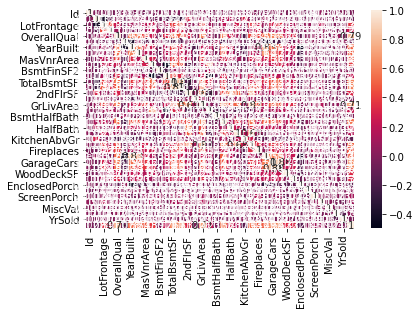

In [4]:
sn.heatmap(corrMatrix, annot=True) # Create and show a heatmap of the correlation
plt.show()                         # matrix with the data shown in each cell.

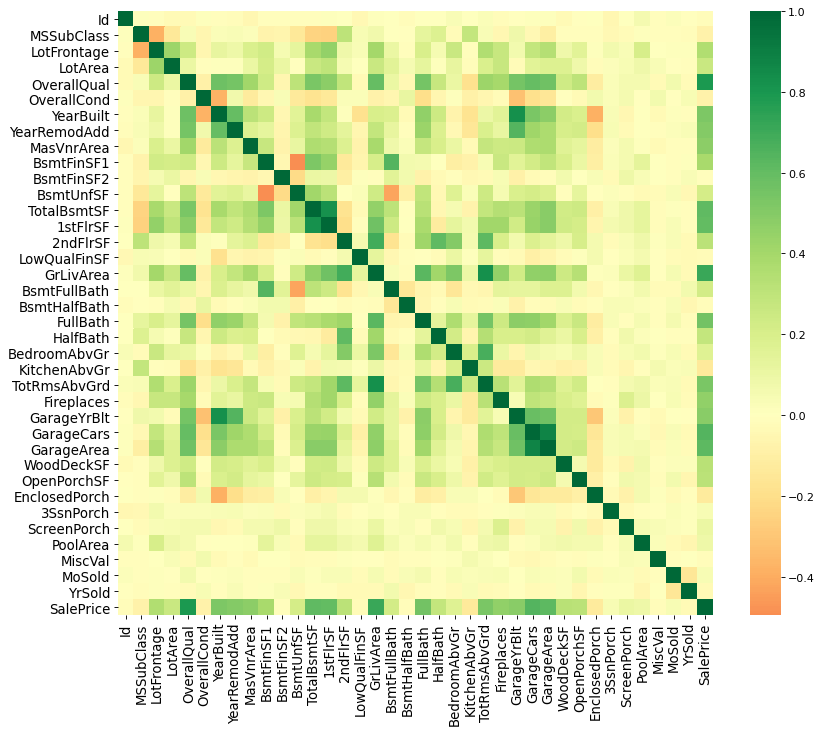

In [7]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sn.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0)#, annot=True)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Select only the Sale Prices row from the correlation matrix, and save it in a vector called SP

In [41]:
SP=corrMatrix['SalePrice']
SP=SP[1>abs(SP)]
SP

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

From SP select only those features that have a correlation with the Sale Price greater than 0.n (n$\in\mathbb{N}$) and save them in a vector called SP_0n

In [42]:
SP_05=SP[abs(SP) > 0.5]
SP_05

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64

In [45]:
SP_06=SP[abs(SP) > 0.6]
SP_06

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [44]:
SP_07=SP[abs(SP) > 0.7]
SP_07

OverallQual    0.790982
GrLivArea      0.708624
Name: SalePrice, dtype: float64

## Plan:

1-Use different classification techniques (knn, discriminant analysis, etc.) with different values of n to select the relevant features, obtaining many different prediction models. 

2-Then, split the train data in train and test data randomly to check the best prediction behaviour. 

3-Finally select the best model to predict the test data house prices.